In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fnz = []

In [3]:
fnorm = 0.09

In [4]:
fnznp = np.array(fnz, dtype=np.float64)

In [5]:
fnzpm = np.hstack((fnznp, -fnznp[(fnznp != 0.0) & (fnznp != 0.5)], [-fnorm]))

In [6]:
fnzpm

array([-0.09])

In [7]:
binomials = np.vstack((np.exp(-2j*np.pi*fnzpm), np.full_like(fnzpm, -1)))

In [8]:
binomials = np.moveaxis(binomials, 0, 1)

In [9]:
binomials

array([[ 0.84432793+0.53582679j, -1.        +0.j        ]])

In [10]:
numer = binomials[0]

In [11]:
for b in binomials[1:]:
    numer = np.concolve(acc, b)

In [12]:
numer

array([ 0.84432793+0.53582679j, -1.        +0.j        ])

In [13]:
denom_factors = np.exp(-2j*np.pi*fnzpm) - np.exp(-2j*np.pi*fnorm)

In [14]:
denom = denom_factors.prod()

In [15]:
denom

1.0716535899579933j

In [16]:
first_ddelay = np.floor(1/fnorm - 0.5*len(fnzpm) + 1)

In [17]:
first_ddelay

11.0

In [18]:
coeffs = np.exp(2j*np.pi*fnorm*first_ddelay)*numer/denom

In [19]:
coeffs

array([0.44954235-0.8177145j , 0.05859218+0.93129602j])

In [20]:
coeffs_re = 2*np.real(coeffs)

In [21]:
coeffs_re

array([0.8990847 , 0.11718436])

In [22]:
transf = (np.exp(-2j*np.pi*np.arange(first_ddelay, first_ddelay+len(fnzpm))[None, :]*np.arange(0, 0.5, 0.25*fnorm)[:, None])*coeffs_re[None, :]).sum(axis=1)

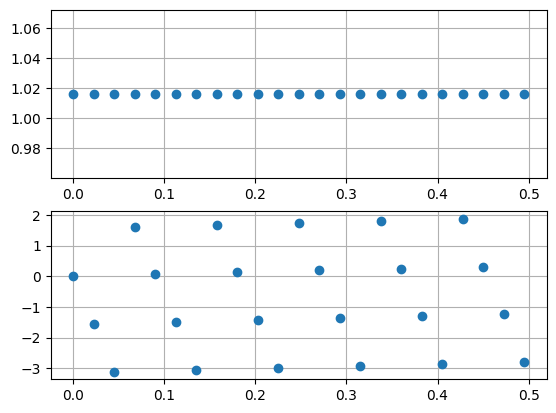

In [23]:
fig, ax = plt.subplots(2)
ax[0].plot(np.arange(0, 0.5, 0.25*fnorm), np.abs(transf), "o")
ax[1].plot(np.arange(0, 0.5, 0.25*fnorm), np.angle(transf), "o")
ax[0].grid()
ax[1].grid()